In [1]:
import datetime
principio = datetime.datetime.now()

In [2]:
import warnings

# Ignorar todos los warnings
warnings.filterwarnings("ignore")

# Tu código aquí
import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


Bad key savefig.frameon in file C:\Users\manue\anaconda3\envs\TecnicasPrediccion\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file C:\Users\manue\anaconda3\envs\TecnicasPrediccion\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file C:\Users\manue\anaconda3\envs\TecnicasPrediccion\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.std

In [3]:
import warnings

# Ignorar todos los warnings
warnings.filterwarnings("ignore")
data=pd.read_excel('../data/viajeros.xlsx')

In [4]:
nuevos_titulos = ['Año', 'Mes', 'Día mes', 'Billetes']
data.columns = nuevos_titulos

In [5]:
data['Billetes'] = data['Billetes'].astype(int)

In [6]:
mapeo_meses = {'Gener': '01', 'Febrer': '02', 'Març': '03',
               'Abril': '04', 'Maig': '05', 'Juny': '06',
               'Juliol': '07', 'Agost': '08', 'Setembre': '09',
               'Octubre': '10', 'Novembre': '11', 'Desembre': '12'}
mapeo_día = {str(i): f"{i:02d}" for i in range(1, 32)}

data['Mes'] = data['Mes'].map(mapeo_meses)
data['Día mes'] = data['Día mes'].astype(str).map(mapeo_día)

In [7]:
# Ordenar primero por "Mes" y luego por "Día"
data = data.sort_values(by=['Año', 'Mes', 'Día mes'])

In [8]:
import pandas as pd

# Crea una nueva columna 'Fecha' usando las columnas de año, mes y día
data['Fecha'] = pd.to_datetime(data[['Año', 'Mes', 'Día mes']].astype(str).agg('-'.join, axis=1))

# Crea la columna 'Día de la semana'
data['Día semana'] = data['Fecha'].dt.day_name()

# Diccionario de traducción de días de la semana
traduccion_dias = {
    'Monday': 'Lunes',
    'Tuesday': 'Martes',
    'Wednesday': 'Miércoles',
    'Thursday': 'Jueves',
    'Friday': 'Viernes',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}

# Aplicar la traducción al DataFrame
data['Día semana'] = data['Día semana'].map(traduccion_dias)


In [9]:
data = data.reset_index(drop=True)

In [10]:
data

,Año,Mes,Día mes,Billetes,Fecha,Día semana
0,2013,01,01,2338,2013-01-01,Martes
1,2013,01,02,9376,2013-01-02,Miércoles
2,2013,01,03,9190,2013-01-03,Jueves
3,2013,01,04,9523,2013-01-04,Viernes
4,2013,01,05,5492,2013-01-05,Sábado
...,...,...,...,...,...,...
1456,2016,12,27,23928,2016-12-27,Martes
1457,2016,12,28,23960,2016-12-28,Miércoles
1458,2016,12,29,24279,2016-12-29,Jueves
1459,2016,12,30,22763,2016-12-30,Viernes


### Festivos
Es relevante computar los festivos, ya que son una variable dummy interesante a la hora de predecir cuántos billetes se van a comprar un día. Datos obtenidos de la página web del gobierno balear, que es quien marca los festivos en las islas.

In [11]:
festivos = ['2013-01-01', '2013-03-01', '2013-03-28', '2013-03-29', '2013-04-01', '2013-05-01', '2013-08-15', '2013-10-12', '2013-11-01', '2013-12-06', '2013-12-25', '2013-12-26', '2014-01-01', '2014-01-06', '2014-03-01', '2014-04-17', '2014-04-18', '2014-05-01', '2014-08-15', '2014-11-01', '2014-12-06', '2014-12-25', '2014-12-26', '2015-01-01', '2015-01-06', '2015-04-02', '2015-04-03', '2015-04-06', '2015-05-01', '2015-08-15', '2015-10-12', '2015-11-02', '2015-12-07', '2015-12-08', '2015-12-25', '2016-01-01', '2016-01-06', '2016-03-01', '2016-03-24', '2016-03-25', '2016-03-28', '2016-08-15', '2016-10-12', '2016-11-01', '2016-12-06', '2016-12-08', '2016-12-26']

In [12]:
data.loc[data['Fecha'].isin(pd.to_datetime(festivos)), 'Festivo'] = 1
data.fillna(0, inplace=True)
data['Festivo'] = data['Festivo'].astype(int)

In [13]:
#Eliminamos las que ya no necesitamos
nuevo_orden = ['Fecha', 'Día semana', 'Festivo', 'Billetes']
data = data[nuevo_orden]

In [14]:
data

,Fecha,Día semana,Festivo,Billetes
0,2013-01-01,Martes,1,2338
1,2013-01-02,Miércoles,0,9376
2,2013-01-03,Jueves,0,9190
3,2013-01-04,Viernes,0,9523
4,2013-01-05,Sábado,0,5492
...,...,...,...,...
1456,2016-12-27,Martes,0,23928
1457,2016-12-28,Miércoles,0,23960
1458,2016-12-29,Jueves,0,24279
1459,2016-12-30,Viernes,0,22763


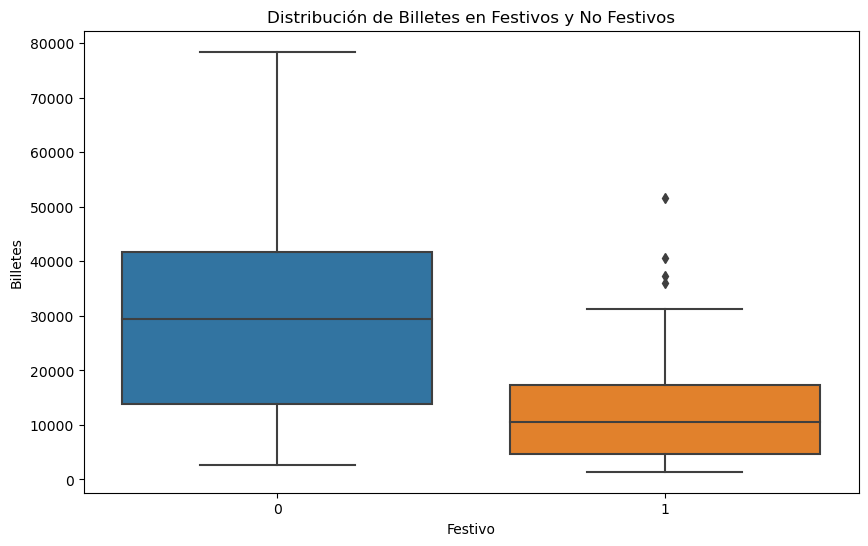

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Festivo', y='Billetes', data=data)
plt.title('Distribución de Billetes en Festivos y No Festivos')
plt.xlabel('Festivo')
plt.ylabel('Billetes')
plt.show()

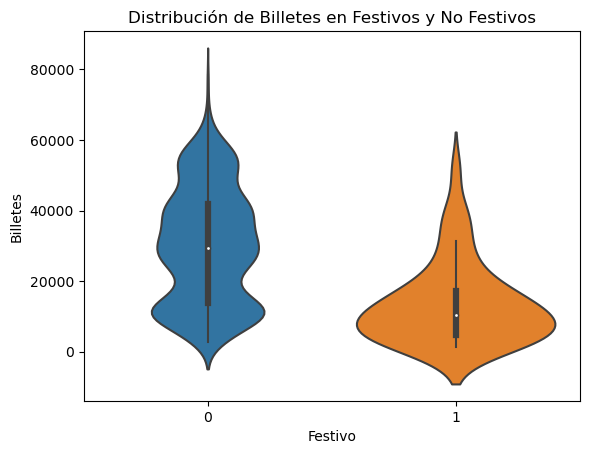

In [16]:
sns.violinplot(x='Festivo', y='Billetes', data=data)
plt.title('Distribución de Billetes en Festivos y No Festivos')
plt.xlabel('Festivo')
plt.ylabel('Billetes')
plt.show()

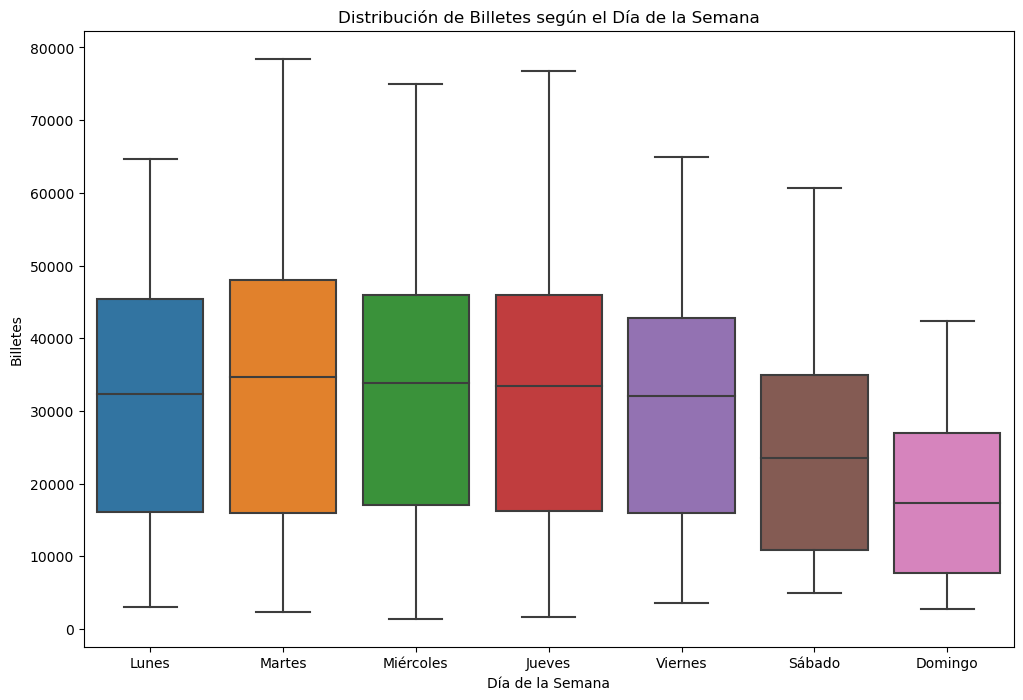

In [17]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Día semana', y='Billetes', data=data, order=['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'])
plt.title('Distribución de Billetes según el Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Billetes')
plt.show()

In [18]:
data

,Fecha,Día semana,Festivo,Billetes
0,2013-01-01,Martes,1,2338
1,2013-01-02,Miércoles,0,9376
2,2013-01-03,Jueves,0,9190
3,2013-01-04,Viernes,0,9523
4,2013-01-05,Sábado,0,5492
...,...,...,...,...
1456,2016-12-27,Martes,0,23928
1457,2016-12-28,Miércoles,0,23960
1458,2016-12-29,Jueves,0,24279
1459,2016-12-30,Viernes,0,22763


In [19]:
# Filtrar sábados, domingos o días festivos
filtro_fin_de_semana_festivo = (
    (data['Día semana'].isin(['Sábado', 'Domingo'])) | 
    (data['Festivo'] == 1)
)

data_fin_de_semana_festivo = data[filtro_fin_de_semana_festivo]
data_fin_de_semana_festivo

,Fecha,Día semana,Festivo,Billetes
0,2013-01-01,Martes,1,2338
4,2013-01-05,Sábado,0,5492
5,2013-01-06,Domingo,0,3256
11,2013-01-12,Sábado,0,6501
12,2013-01-13,Domingo,0,3169
...,...,...,...,...
1447,2016-12-18,Domingo,0,7809
1453,2016-12-24,Sábado,0,10724
1454,2016-12-25,Domingo,0,3956
1455,2016-12-26,Lunes,1,9057


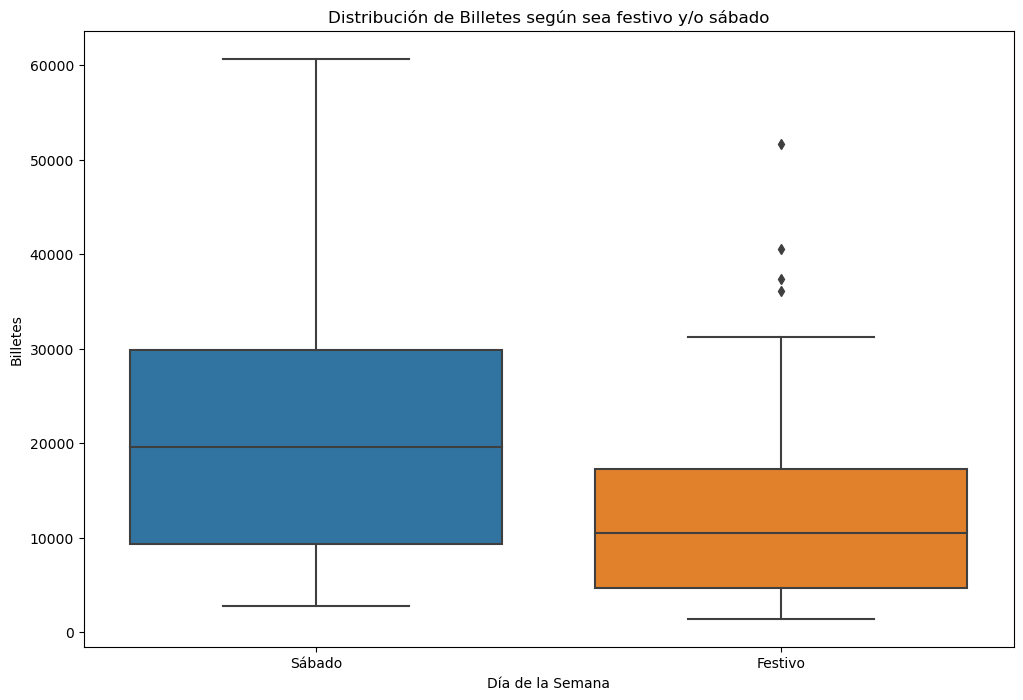

In [20]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Festivo', y='Billetes', data=data_fin_de_semana_festivo)
plt.title('Distribución de Billetes según sea festivo y/o sábado')
plt.xlabel('Día de la Semana')
plt.ylabel('Billetes')
nuevos_titulos_x = ['Sábado', 'Festivo']
plt.xticks([0, 1], nuevos_titulos_x)
plt.show()

In [21]:
data.set_index('Fecha', inplace=True)

In [22]:
#DF solo de fechas y billetes
columnas_a_mantener = ['Billetes']
data = data[columnas_a_mantener]
data

,Billetes
Fecha,
2013-01-01,2338
2013-01-02,9376
2013-01-03,9190
2013-01-04,9523
2013-01-05,5492
...,...
2016-12-27,23928
2016-12-28,23960
2016-12-29,24279


                Fecha   Media_Movil
Fecha                              
2013-01-01 2013-01-01           NaN
2013-01-02 2013-01-02           NaN
2013-01-03 2013-01-03           NaN
2013-01-04 2013-01-04           NaN
2013-01-05 2013-01-05           NaN
...               ...           ...
2016-12-27 2016-12-27  17371.142857
2016-12-28 2016-12-28  17338.000000
2016-12-29 2016-12-29  17091.285714
2016-12-30 2016-12-30  16952.428571
2016-12-31 2016-12-31  16184.142857

[1461 rows x 2 columns]


Text(0, 0.5, 'Billetes vendidos')

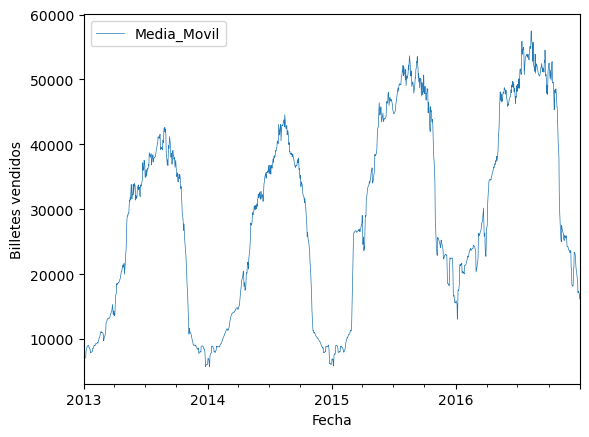

In [23]:
# # Calcular la media móvil con una ventana de n días
# n = 15  # Puedes ajustar n según tus necesidades
# media_movil = data['Billetes'].rolling(window=n).mean()
# media_movil = pd.DataFrame({ 'Media_Movil': media_movil})
# # Mostrar los resultados
# media_movil

import pandas as pd

# Supongamos que 'data' es tu DataFrame original con la columna 'Billetes' que contiene tus datos diarios.

# Calcular la media móvil
n = 7  # Puedes ajustar n según tus necesidades
media_movil = data['Billetes'].rolling(window=n).mean()

# Crear un nuevo DataFrame con la columna de la media móvil
df_media_movil = pd.DataFrame({'Fecha': data.index, 'Media_Movil': media_movil})

# Mostrar el nuevo DataFrame
print(df_media_movil)

# Graficar la media móvil
df_media_movil.plot(x='Fecha', y='Media_Movil', linewidth=0.5)
plt.ylabel('Billetes vendidos')



Con una media móvil de 7 días, comprobamos la estacionalidad de la serie temporal.

Queda claro que no es estacionaria ni en media. Sin embargo, no podemos asegurar, solo mediante la visualización del gráfico, si la serie es o no estacionaria en varianza, por ello recurrimos al test de Dickey-Fuller para realizar la comprobación.

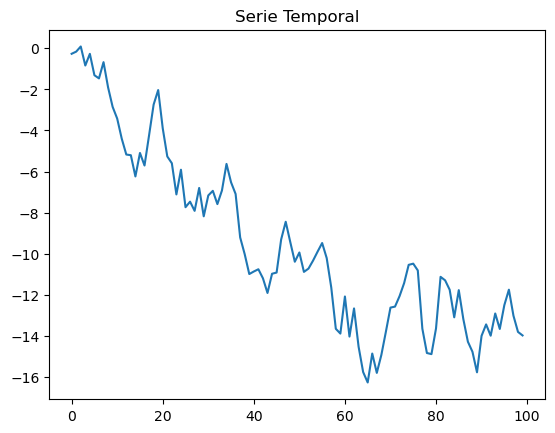

Estadística ADF: -1.9298887321528755
Valor p: 0.3181337441667048
Valores críticos: {'1%': -3.498198082189098, '5%': -2.891208211860468, '10%': -2.5825959973472097}
La serie no es estacionaria en varianza (no se puede rechazar la hipótesis nula)


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Generar una serie temporal ficticia (puedes reemplazarla con tus propios datos)
np.random.seed(41)
serie_temporal = np.cumsum(np.random.normal(size=100))

# Función para realizar la prueba de Dickey-Fuller Aumentada
def prueba_adf(data):
    resultado_adf = adfuller(data, autolag='AIC')
    print('Estadística ADF:', resultado_adf[0])
    print('Valor p:', resultado_adf[1])
    print('Valores críticos:', resultado_adf[4])
    
    if resultado_adf[1] <= 0.05:
        print("La serie es estacionaria en varianza (rechazar la hipótesis nula)")
    else:
        print("La serie no es estacionaria en varianza (no se puede rechazar la hipótesis nula)")

# Visualizar la serie temporal
plt.plot(serie_temporal)
plt.title('Serie Temporal')
plt.show()

# Realizar la prueba de Dickey-Fuller Aumentada
prueba_adf(serie_temporal)


In [25]:
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(14, 4)})

In [26]:
data_q=data.resample("q").last()

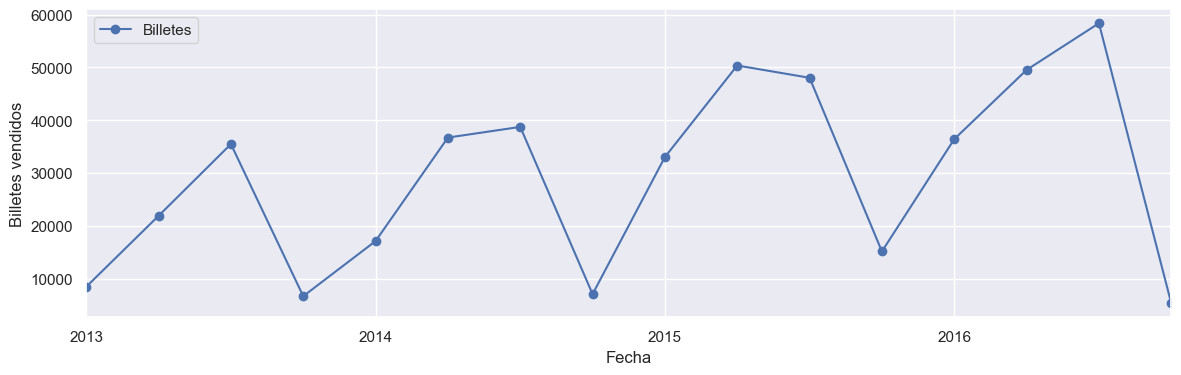

In [27]:
ax = data_q.plot(marker='o', linestyle='-')
ax.set_ylabel('Billetes vendidos');

### Gráfico estacional

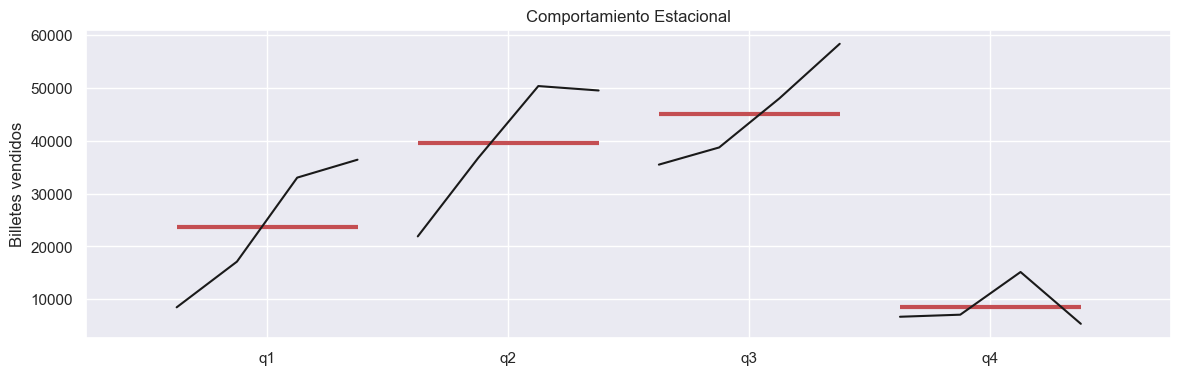

In [28]:
ax = plt.gca()
sm.graphics.tsa.quarter_plot(data_q['Billetes'],ax=ax)
ax.set_title('Comportamiento Estacional')
ax.set_ylabel('Billetes vendidos');

En los tres primeros trimestres del año la tendencia ha sido ascendente, pero ahora ha empezado a descender en los meses de primavera y otoño, probablmente afectados por el efecto Semana Santa.

Text(0.5, 0, 'Cuatrimestre')

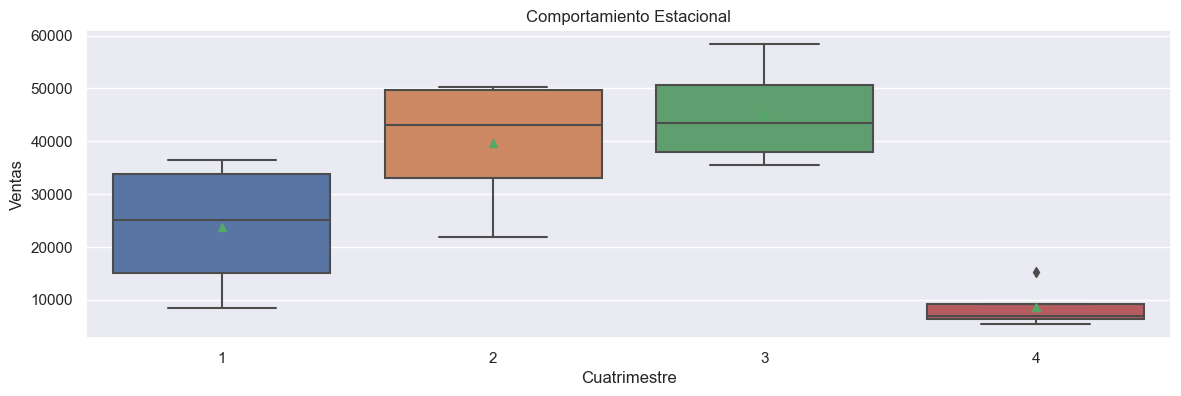

In [29]:
#Seasonal Events
data_q['Q'] = data_q.index.quarter

sns.boxplot(data=data_q, x='Q', y='Billetes',showmeans=True)
ax = plt.gca()
ax.set_ylabel('Ventas')
ax.set_title('Comportamiento Estacional')
ax.set_xlabel('Cuatrimestre')

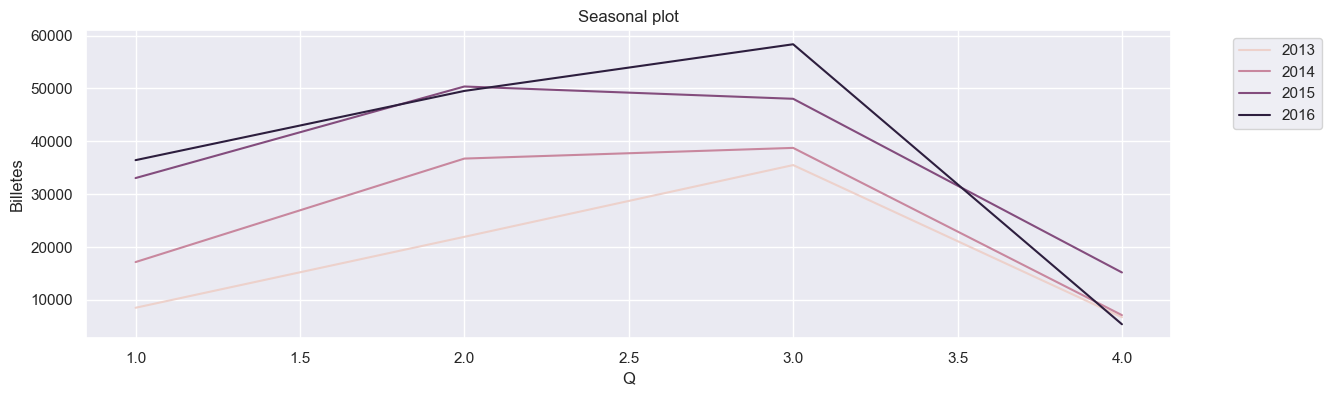

In [30]:
data_q['Y'] = data_q.index.year
sns.lineplot(data=data_q, 
             x='Q', 
             y='Billetes', 
             hue='Y', 
             legend='full')

# add title
plt.title('Seasonal plot')

# move the legend outside of the main figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2);

Durante el año, los viajes en transporte público se maximizan durante la temporada turística, al final del segundo trimestre y al principio del tercero. En el año 2016 se recuperó el tercer cuatrimestre como el que tiene más viajeros.

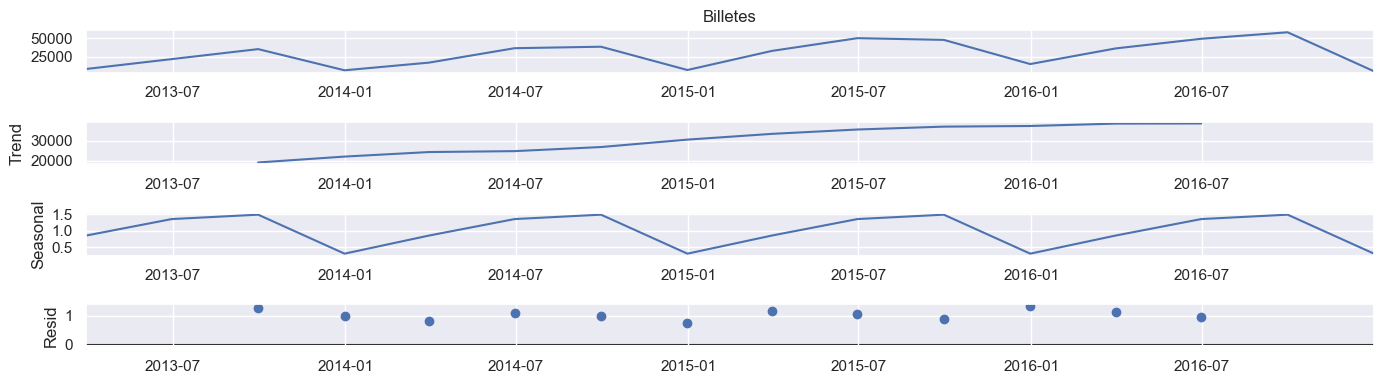

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data_q['Billetes'], 
                                   model='multiplicative', 
                                   period=4)
decomposition.plot();

In [32]:
data.to_csv('../data/datos sin días.csv', index=True)

### Agrupamos por semanas

In [33]:
df_sin_primeras_cinco = data.iloc[5:]
type(df_sin_primeras_cinco.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [34]:
data_semanal = df_sin_primeras_cinco.resample('W-Sat').sum()

In [35]:
data_semanal.tail(14)

,Billetes
Fecha,
2016-10-01,365445
2016-10-08,349203
2016-10-15,343670
2016-10-22,340002
2016-10-29,279404
2016-11-05,183583
2016-11-12,184902
2016-11-19,178948
2016-11-26,169766


In [36]:
data_semanal.to_csv('../data/datos semanales.csv', index=True)

In [37]:
data_semanal

,Billetes
Fecha,
2013-01-12,62614
2013-01-19,59301
2013-01-26,56391
2013-02-02,62981
2013-02-09,65258
...,...
2016-12-03,163841
2016-12-10,127511
2016-12-17,162260


In [38]:
final = datetime.datetime.now()
duracion = final-principio
print(duracion)

0:00:05.835743
